🚀 Welcome to the Enhanced PRNG Analysis System!
📊 Now with Statistical Graph Generation!

           ENHANCED PRNG ANALYSIS SYSTEM
              with Statistical Graphs
1.  Configure LFSR Parameters
2.  Generate and Analyze LFSR Sequence
3.  Compare with Python Built-in Random
4.  Custom Sequence Analysis
5.  View Statistical Test Documentation
6.  Export Demo Analysis Reports
7.  Generate Comprehensive Graphs
8.  Real-time Analysis Dashboard
9.  Exit



Generating 1000 bits...
Running statistical tests...

ANALYSIS RESULTS

Frequency Test (Monobit): ✅ PASS
  Proportion of ones: 0.5040
  P-value: 0.899343

Runs Test: ✅ PASS
  P-value: 0.847543

Serial Test (2-bit patterns): ✅ PASS
  P-value: 0.910653

Byte Distribution Test: ✅ PASS
  P-value: 0.984331

Entropy Test: ❌ FAIL
  Entropy: 6.6618 bits/byte
  Ratio to maximum: 83.3%

SUMMARY
Tests Passed: 4/5
Success Rate: 80.0%
Overall Quality: 👍 VERY GOOD


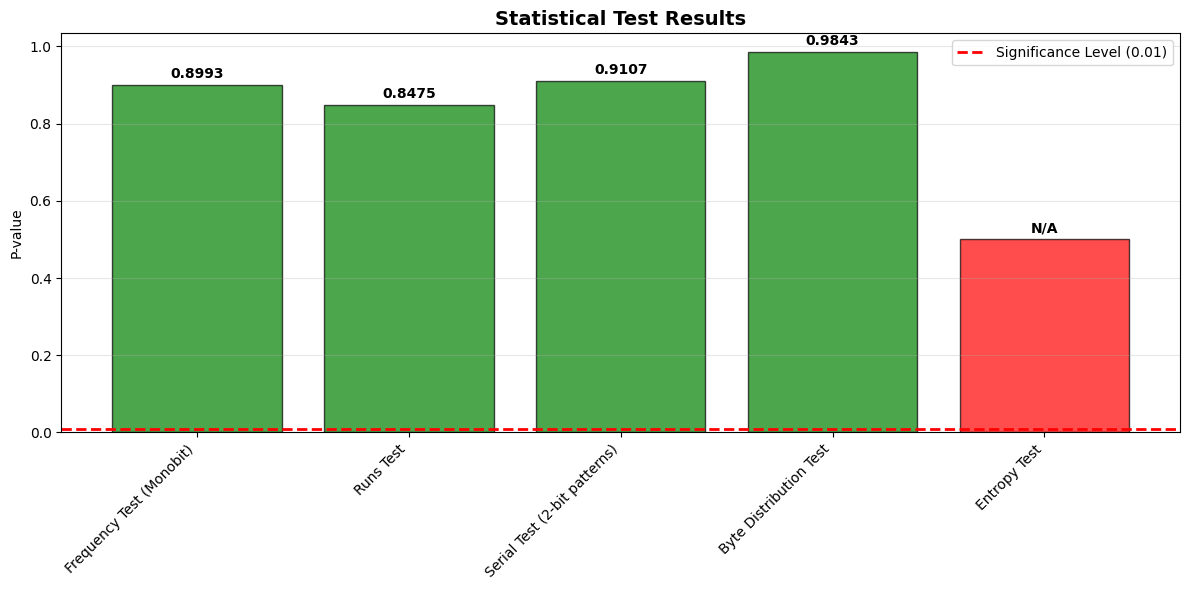


📊 Generate comprehensive graphs? (y/n):  n

📁 Export results to JSON and CSV? (y/n):  n

Press Enter to continue... 



           ENHANCED PRNG ANALYSIS SYSTEM
              with Statistical Graphs
1.  Configure LFSR Parameters
2.  Generate and Analyze LFSR Sequence
3.  Compare with Python Built-in Random
4.  Custom Sequence Analysis
5.  View Statistical Test Documentation
6.  Export Demo Analysis Reports
7.  Generate Comprehensive Graphs
8.  Real-time Analysis Dashboard
9.  Exit


Enter your choice (1-9):  1



--- Configure LFSR Parameters ---

Current Configuration:
  Seed: 12345
  Size: 16 bits
  Polynomial: [16, 15, 13, 4]

Choose configuration option:
A) Use default 16-bit LFSR (recommended)
B) Use 8-bit LFSR
C) Custom configuration
D) Keep current configuration



Enter your choice (A/B/C/D):  A


✅ Configured: 16-bit LFSR with maximum period polynomial



Press Enter to continue... 



           ENHANCED PRNG ANALYSIS SYSTEM
              with Statistical Graphs
1.  Configure LFSR Parameters
2.  Generate and Analyze LFSR Sequence
3.  Compare with Python Built-in Random
4.  Custom Sequence Analysis
5.  View Statistical Test Documentation
6.  Export Demo Analysis Reports
7.  Generate Comprehensive Graphs
8.  Real-time Analysis Dashboard
9.  Exit


Enter your choice (1-9):  2



--- Generate and Analyze LFSR Sequence ---


In [ ]:
"""
COMPLETE ENHANCED PRNG ANALYSIS SYSTEM
With Statistical Graph Generation and All Features
"""

import math
import json
import csv
import datetime
import random
from collections import Counter

try:
    import matplotlib.pyplot as plt
    HAS_MATPLOTLIB = True
except ImportError:
    print("⚠️  matplotlib not available. Running in text-only mode.")
    HAS_MATPLOTLIB = False

class LFSR:
    """Linear Feedback Shift Register Implementation"""
    
    def __init__(self, seed=12345, size=16, polynomial=None):
        self.state = seed
        self.size = size
        if polynomial is None:
            self.polynomial = [16, 15, 13, 4]  # Maximum period polynomial
        else:
            self.polynomial = polynomial
        self.initial_seed = seed
        self.initial_polynomial = polynomial if polynomial else [16, 15, 13, 4]
        self.generated_bits_history = []
    
    def reset(self):
        """Reset LFSR to initial state"""
        self.state = self.initial_seed
        self.generated_bits_history = []
    
    def next_bit(self):
        """Generate next random bit"""
        feedback = 0
        for tap in self.polynomial:
            feedback ^= (self.state >> (tap-1)) & 1
        
        output_bit = self.state & 1
        self.state = (self.state >> 1) | (feedback << (self.size-1))
        self.generated_bits_history.append(output_bit)
        return output_bit
    
    def generate_bits(self, n):
        """Generate n random bits"""
        return [self.next_bit() for _ in range(n)]
    
    def generate_bytes(self, n):
        """Generate n random bytes"""
        bytes_list = []
        for _ in range(n):
            byte_val = 0
            for i in range(8):
                byte_val = (byte_val << 1) | self.next_bit()
            bytes_list.append(byte_val)
        return bytes_list
    
    def get_configuration(self):
        """Return current configuration"""
        return {
            'seed': self.initial_seed,
            'size': self.size,
            'polynomial': self.polynomial
        }

class StatisticalTests:
    """Statistical tests for randomness"""
    
    @staticmethod
    def normal_cdf(x):
        """Approximate normal CDF using error function"""
        return (1 + math.erf(x / math.sqrt(2))) / 2
    
    @staticmethod
    def chi_square_cdf(x, df):
        """Approximate chi-square CDF"""
        if df > 30:
            z = (math.pow(x/df, 1/3) - 1 + 2/(9*df)) / math.sqrt(2/(9*df))
            return StatisticalTests.normal_cdf(z)
        else:
            return 1 - math.exp(-x/2) * sum((x/2)**k / math.factorial(k) for k in range(df//2))
    
    def frequency_test(self, bits):
        """Monobit test - proportion of ones"""
        n = len(bits)
        ones_count = sum(bits)
        proportion = ones_count / n
        
        test_stat = abs(proportion - 0.5) * math.sqrt(n)
        p_value = 2 * (1 - self.normal_cdf(test_stat))
        
        return {
            'test_name': 'Frequency Test (Monobit)',
            'ones_count': ones_count,
            'zeros_count': n - ones_count,
            'proportion': proportion,
            'test_statistic': test_stat,
            'p_value': p_value,
            'passed': p_value > 0.01
        }
    
    def runs_test(self, bits):
        """Test for runs of identical bits"""
        n = len(bits)
        ones_proportion = sum(bits) / n
        
        runs = 1
        run_lengths = []
        current_run = 1
        
        for i in range(1, n):
            if bits[i] == bits[i-1]:
                current_run += 1
            else:
                run_lengths.append(current_run)
                current_run = 1
                runs += 1
        run_lengths.append(current_run)
        
        expected_runs = 2 * n * ones_proportion * (1 - ones_proportion)
        variance = (expected_runs - 1) * (expected_runs - 2) / (n - 1)
        
        if variance > 0:
            z_score = (runs - expected_runs) / math.sqrt(variance)
            p_value = 2 * (1 - self.normal_cdf(abs(z_score)))
        else:
            p_value = 0.0
        
        return {
            'test_name': 'Runs Test',
            'total_runs': runs,
            'expected_runs': expected_runs,
            'run_lengths': run_lengths,
            'z_score': z_score,
            'p_value': p_value,
            'passed': p_value > 0.01
        }
    
    def serial_test(self, bits):
        """Test for 2-bit pattern distribution"""
        n = len(bits)
        
        patterns = Counter()
        for i in range(n-1):
            pattern = (bits[i], bits[i+1])
            patterns[pattern] += 1
        
        expected = (n-1) / 4
        chi_square = 0
        pattern_counts = {}
        for pattern in [(0,0), (0,1), (1,0), (1,1)]:
            observed = patterns.get(pattern, 0)
            pattern_counts[f"pattern_{pattern[0]}{pattern[1]}"] = observed
            chi_square += (observed - expected) ** 2 / expected
        
        p_value = 1 - self.chi_square_cdf(chi_square, 3)
        
        return {
            'test_name': 'Serial Test (2-bit patterns)',
            'pattern_counts': pattern_counts,
            'chi_square': chi_square,
            'p_value': p_value,
            'passed': p_value > 0.01
        }
    
    def byte_distribution_test(self, bytes_seq):
        """Test uniform distribution of bytes"""
        n = len(bytes_seq)
        expected = n / 256
        
        byte_counts = [0] * 256
        for byte_val in bytes_seq:
            byte_counts[byte_val] += 1
        
        chi_square = 0
        for count in byte_counts:
            chi_square += (count - expected) ** 2 / expected
        
        p_value = 1 - self.chi_square_cdf(chi_square, 255)
        
        return {
            'test_name': 'Byte Distribution Test',
            'byte_counts': byte_counts,
            'chi_square': chi_square,
            'p_value': p_value,
            'passed': p_value > 0.01
        }
    
    def entropy_test(self, bytes_seq):
        """Calculate Shannon entropy"""
        n = len(bytes_seq)
        freq_count = [0] * 256
        for byte_val in bytes_seq:
            freq_count[byte_val] += 1
        
        entropy = 0.0
        for count in freq_count:
            if count > 0:
                p = count / n
                entropy -= p * math.log2(p)
        
        max_entropy = 8.0
        entropy_ratio = entropy / max_entropy
        
        return {
            'test_name': 'Entropy Test',
            'entropy': entropy,
            'max_entropy': max_entropy,
            'entropy_ratio': entropy_ratio,
            'passed': entropy_ratio > 0.95
        }

class GraphGenerator:
    """Generates statistical graphs and visualizations"""
    
    @staticmethod
    def plot_bit_sequence(bits, title="Bit Sequence Visualization", save_path=None):
        """Plot the bit sequence as a waveform"""
        if not HAS_MATPLOTLIB:
            print("📊 Text-based bit sequence (first 100 bits):")
            print("   " + "".join(str(b) for b in bits[:100]))
            return
        
        plt.figure(figsize=(12, 4))
        plt.plot(bits[:500], 'b-', alpha=0.7, linewidth=0.8)
        plt.title(title, fontsize=14, fontweight='bold')
        plt.ylabel('Bit Value (0/1)')
        plt.xlabel('Bit Position')
        plt.grid(True, alpha=0.3)
        plt.ylim(-0.1, 1.1)
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"💾 Bit sequence plot saved: {save_path}")
        plt.show()
    
    @staticmethod
    def plot_frequency_analysis(bits, title="Frequency Analysis", save_path=None):
        """Plot running proportion of ones"""
        if not HAS_MATPLOTLIB:
            ones = sum(bits)
            total = len(bits)
            print(f"📈 Frequency Analysis:")
            print(f"   Final proportion of ones: {ones}/{total} = {ones/total:.3f}")
            return
        
        running_ones = [sum(bits[:i+1])/(i+1) for i in range(min(len(bits), 2000))]
        
        plt.figure(figsize=(12, 5))
        plt.plot(running_ones, 'r-', alpha=0.7, linewidth=1)
        plt.axhline(y=0.5, color='black', linestyle='--', linewidth=2, label='Expected (0.5)')
        plt.title(title, fontsize=14, fontweight='bold')
        plt.xlabel('Bit Position')
        plt.ylabel('Running Proportion of Ones')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.ylim(0.4, 0.6)
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"💾 Frequency analysis plot saved: {save_path}")
        plt.show()
    
    @staticmethod
    def plot_byte_distribution(bytes_seq, title="Byte Value Distribution", save_path=None):
        """Plot histogram of byte values"""
        if not HAS_MATPLOTLIB:
            print("📊 Byte distribution summary:")
            unique_bytes = len(set(bytes_seq))
            print(f"   Unique byte values: {unique_bytes}/256")
            return
        
        plt.figure(figsize=(12, 6))
        plt.hist(bytes_seq, bins=50, alpha=0.7, color='green', edgecolor='black')
        plt.title(title, fontsize=14, fontweight='bold')
        plt.xlabel('Byte Value (0-255)')
        plt.ylabel('Frequency')
        plt.grid(True, alpha=0.3)
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"💾 Byte distribution plot saved: {save_path}")
        plt.show()
    
    @staticmethod
    def plot_run_length_distribution(run_lengths, title="Run Length Distribution", save_path=None):
        """Plot distribution of run lengths"""
        if not HAS_MATPLOTLIB:
            print("📊 Run length statistics:")
            avg_run = sum(run_lengths) / len(run_lengths)
            max_run = max(run_lengths)
            print(f"   Average run length: {avg_run:.2f}")
            print(f"   Maximum run length: {max_run}")
            return
        
        run_counts = Counter(run_lengths)
        runs = list(run_counts.keys())
        counts = list(run_counts.values())
        
        plt.figure(figsize=(10, 6))
        plt.bar(runs, counts, alpha=0.7, color='purple', edgecolor='black')
        plt.title(title, fontsize=14, fontweight='bold')
        plt.xlabel('Run Length')
        plt.ylabel('Frequency')
        plt.grid(True, alpha=0.3, axis='y')
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"💾 Run length distribution saved: {save_path}")
        plt.show()
    
    @staticmethod
    def plot_autocorrelation(bits, max_lag=50, title="Autocorrelation Analysis", save_path=None):
        """Plot autocorrelation function"""
        n = len(bits)
        lags = list(range(1, min(max_lag, n//2) + 1))
        correlations = []
        
        for lag in lags:
            correlated = sum(1 for i in range(n - lag) if bits[i] == bits[i + lag])
            proportion = correlated / (n - lag)
            correlations.append(proportion)
        
        if not HAS_MATPLOTLIB:
            print("📊 Autocorrelation summary:")
            print(f"   Average correlation: {sum(correlations)/len(correlations):.3f}")
            return
        
        plt.figure(figsize=(12, 5))
        plt.plot(lags, correlations, 'bo-', alpha=0.7, markersize=4)
        plt.axhline(y=0.5, color='red', linestyle='--', linewidth=2, label='Expected (0.5)')
        plt.title(title, fontsize=14, fontweight='bold')
        plt.xlabel('Lag')
        plt.ylabel('Correlation Proportion')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"💾 Autocorrelation plot saved: {save_path}")
        plt.show()
    
    @staticmethod
    def plot_test_results(test_results, title="Statistical Test Results", save_path=None):
        """Plot test results as a bar chart"""
        if not HAS_MATPLOTLIB:
            print("📊 Test results summary:")
            for test in test_results:
                status = "PASS" if test['passed'] else "FAIL"
                print(f"   {test['test_name']}: {status}")
            return
        
        test_names = [test['test_name'] for test in test_results]
        p_values = []
        for test in test_results:
            if 'p_value' in test and test['p_value'] is not None:
                p_values.append(test['p_value'])
            else:
                p_values.append(0.5)  # Default for tests without p-value
        
        passed = [test['passed'] for test in test_results]
        
        colors = ['green' if p else 'red' for p in passed]
        
        plt.figure(figsize=(12, 6))
        bars = plt.bar(test_names, p_values, color=colors, alpha=0.7, edgecolor='black')
        plt.axhline(y=0.01, color='red', linestyle='--', linewidth=2, label='Significance Level (0.01)')
        plt.title(title, fontsize=14, fontweight='bold')
        plt.ylabel('P-value')
        plt.xticks(rotation=45, ha='right')
        plt.legend()
        plt.grid(True, alpha=0.3, axis='y')
        
        # Add value labels on bars
        for bar, p_val, test in zip(bars, p_values, test_results):
            if 'p_value' in test and test['p_value'] is not None:
                label = f'{p_val:.4f}'
            else:
                label = 'N/A'
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                    label, ha='center', va='bottom', fontweight='bold')
        
        plt.tight_layout()
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"💾 Test results plot saved: {save_path}")
        plt.show()
    
    @staticmethod
    def plot_comprehensive_analysis(bits, bytes_seq, test_results, save_prefix="prng_analysis"):
        """Generate all graphs in one comprehensive analysis"""
        print("\n🎨 Generating Comprehensive Visual Analysis...")
        
        # Generate all plots
        GraphGenerator.plot_bit_sequence(bits, save_path=f"{save_prefix}_bit_sequence.png")
        GraphGenerator.plot_frequency_analysis(bits, save_path=f"{save_prefix}_frequency.png")
        GraphGenerator.plot_byte_distribution(bytes_seq, save_path=f"{save_prefix}_byte_dist.png")
        
        # Get run lengths for run length distribution
        run_lengths = []
        if bits:
            current_run = 1
            for i in range(1, len(bits)):
                if bits[i] == bits[i-1]:
                    current_run += 1
                else:
                    run_lengths.append(current_run)
                    current_run = 1
            run_lengths.append(current_run)
            GraphGenerator.plot_run_length_distribution(run_lengths, save_path=f"{save_prefix}_run_lengths.png")
        
        GraphGenerator.plot_autocorrelation(bits, save_path=f"{save_prefix}_autocorrelation.png")
        GraphGenerator.plot_test_results(test_results, save_path=f"{save_prefix}_test_results.png")
        
        print(f"📁 All graphs saved with prefix: {save_prefix}_*.png")

class ReportGenerator:
    """Generates JSON and CSV reports"""
    
    @staticmethod
    def generate_json_report(test_results, lfsr_config, sequence_info, filename="demo_analysis.json"):
        """Generate comprehensive JSON report"""
        report = {
            'analysis_metadata': {
                'timestamp': datetime.datetime.now().isoformat(),
                'system_version': 'PRNG Analysis System v2.0 with Graphs',
                'analysis_type': 'LFSR Statistical Testing'
            },
            'lfsr_configuration': lfsr_config,
            'sequence_information': sequence_info,
            'statistical_tests': test_results,
            'summary': {
                'total_tests': len(test_results),
                'passed_tests': sum(1 for t in test_results if t['passed']),
                'success_rate': sum(1 for t in test_results if t['passed']) / len(test_results),
                'quality_assessment': ReportGenerator.assess_quality(test_results),
                'overall_result': 'PASS' if all(t['passed'] for t in test_results) else 'FAIL'
            }
        }
        
        try:
            with open(filename, 'w', encoding='utf-8') as f:
                json.dump(report, f, indent=2, ensure_ascii=False)
            print(f"📄 JSON report saved as: {filename}")
            return True
        except Exception as e:
            print(f"❌ Error saving JSON report: {e}")
            return False
    
    @staticmethod
    def generate_csv_report(test_results, lfsr_config, sequence_info, filename="demo_analysis.csv"):
        """Generate CSV report for spreadsheet analysis"""
        try:
            with open(filename, 'w', newline='', encoding='utf-8') as f:
                writer = csv.writer(f)
                
                # Header section
                writer.writerow(['PRNG ANALYSIS REPORT'])
                writer.writerow(['Timestamp', datetime.datetime.now().isoformat()])
                writer.writerow(['System Version', 'PRNG Analysis System v2.0 with Graphs'])
                writer.writerow([])
                
                # LFSR Configuration
                writer.writerow(['LFSR CONFIGURATION'])
                writer.writerow(['Parameter', 'Value'])
                writer.writerow(['Seed', lfsr_config['seed']])
                writer.writerow(['Size (bits)', lfsr_config['size']])
                writer.writerow(['Polynomial', str(lfsr_config['polynomial'])])
                writer.writerow([])
                
                # Sequence Information
                writer.writerow(['SEQUENCE INFORMATION'])
                writer.writerow(['Parameter', 'Value'])
                for key, value in sequence_info.items():
                    writer.writerow([key.replace('_', ' ').title(), value])
                writer.writerow([])
                
                # Test Results
                writer.writerow(['STATISTICAL TEST RESULTS'])
                writer.writerow(['Test Name', 'P-Value', 'Result', 'Status'])
                for test in test_results:
                    test_name = test['test_name']
                    p_value = test.get('p_value', 'N/A')
                    result = 'PASS' if test['passed'] else 'FAIL'
                    status = 'RANDOM' if test['passed'] else 'NON-RANDOM'
                    writer.writerow([test_name, p_value, result, status])
                writer.writerow([])
                
                # Summary
                passed_tests = sum(1 for t in test_results if t['passed'])
                total_tests = len(test_results)
                success_rate = passed_tests / total_tests
                
                writer.writerow(['SUMMARY'])
                writer.writerow(['Total Tests', total_tests])
                writer.writerow(['Passed Tests', passed_tests])
                writer.writerow(['Success Rate', f"{success_rate:.1%}"])
                writer.writerow(['Quality Assessment', ReportGenerator.assess_quality(test_results)])
                writer.writerow(['Overall Result', 'PASS' if all(t['passed'] for t in test_results) else 'FAIL'])
            
            print(f"📊 CSV report saved as: {filename}")
            return True
        except Exception as e:
            print(f"❌ Error saving CSV report: {e}")
            return False
    
    @staticmethod
    def assess_quality(test_results):
        """Assess overall quality based on test results"""
        passed = sum(1 for t in test_results if t['passed'])
        total = len(test_results)
        ratio = passed / total
        
        if ratio == 1.0: 
            return "EXCELLENT - Cryptographically secure"
        elif ratio >= 0.8: 
            return "VERY GOOD - Suitable for most applications"
        elif ratio >= 0.6: 
            return "GOOD - Acceptable for non-critical use"
        elif ratio >= 0.4: 
            return "FAIR - Shows some non-random patterns"
        else: 
            return "POOR - Not suitable for cryptographic use"

class EnhancedPRNGAnalysisSystem:
    """Enhanced PRNG Analysis System with Graph Generation"""
    
    def __init__(self):
        self.lfsr = None
        self.tester = StatisticalTests()
        self.graph_generator = GraphGenerator()
        self.report_generator = ReportGenerator()
        self.sequence_length = 10000
        self.current_bits = []
        self.current_bytes = []
    
    def display_menu(self):
        """Display the enhanced main menu"""
        print("\n" + "="*60)
        print("           ENHANCED PRNG ANALYSIS SYSTEM")
        print("              with Statistical Graphs")
        print("="*60)
        print("1.  Configure LFSR Parameters")
        print("2.  Generate and Analyze LFSR Sequence")  
        print("3.  Compare with Python Built-in Random")
        print("4.  Custom Sequence Analysis")
        print("5.  View Statistical Test Documentation")
        print("6.  Export Demo Analysis Reports")
        print("7.  Generate Comprehensive Graphs")
        print("8.  Real-time Analysis Dashboard")
        print("9.  Exit")
        print("="*60)
        if not HAS_MATPLOTLIB:
            print("⚠️  Graph features disabled (matplotlib not available)")
        print("="*60)
    
    def configure_lfsr(self):
        """Option 1: Configure LFSR parameters"""
        print("\n--- Configure LFSR Parameters ---")
        
        print("\nCurrent Configuration:" if self.lfsr else "\nNo LFSR configured yet.")
        if self.lfsr:
            config = self.lfsr.get_configuration()
            print(f"  Seed: {config['seed']}")
            print(f"  Size: {config['size']} bits")
            print(f"  Polynomial: {config['polynomial']}")
        
        print("\nChoose configuration option:")
        print("A) Use default 16-bit LFSR (recommended)")
        print("B) Use 8-bit LFSR")
        print("C) Custom configuration")
        print("D) Keep current configuration")
        
        choice = input("\nEnter your choice (A/B/C/D): ").strip().upper()
        
        if choice == 'A':
            self.lfsr = LFSR(seed=12345, size=16, polynomial=[16, 15, 13, 4])
            print("✅ Configured: 16-bit LFSR with maximum period polynomial")
            
        elif choice == 'B':
            self.lfsr = LFSR(seed=1, size=8, polynomial=[8, 6, 5, 4])
            print("✅ Configured: 8-bit LFSR with polynomial [8,6,5,4]")
            
        elif choice == 'C':
            try:
                size = int(input("Enter LFSR size (8, 16, or 32): "))
                seed = int(input("Enter seed value: "))
                
                print("Common polynomials:")
                if size == 8:
                    print("  Example: 8,6,5,4 for x^8 + x^6 + x^5 + x^4 + 1")
                elif size == 16:
                    print("  Example: 16,15,13,4 for maximum period")
                
                poly_input = input("Enter polynomial taps (comma-separated): ")
                polynomial = [int(x.strip()) for x in poly_input.split(',')]
                
                self.lfsr = LFSR(seed=seed, size=size, polynomial=polynomial)
                print(f"✅ Configured: {size}-bit LFSR with polynomial {polynomial}")
                
            except ValueError as e:
                print(f"❌ Invalid input: {e}")
                print("Using default configuration instead.")
                self.lfsr = LFSR(seed=12345, size=16, polynomial=[16, 15, 13, 4])
                
        elif choice == 'D':
            if self.lfsr:
                print("✅ Keeping current configuration")
            else:
                print("❌ No current configuration. Using default.")
                self.lfsr = LFSR(seed=12345, size=16, polynomial=[16, 15, 13, 4])
        else:
            print("❌ Invalid choice. Using default configuration.")
            self.lfsr = LFSR(seed=12345, size=16, polynomial=[16, 15, 13, 4])
        
        input("\nPress Enter to continue...")
    
    def analyze_sequence(self):
        """Option 2: Generate and analyze LFSR sequence"""
        if not self.lfsr:
            print("❌ Please configure LFSR first (Option 1)")
            input("Press Enter to continue...")
            return
        
        print("\n--- Generate and Analyze LFSR Sequence ---")
        
        try:
            length = input(f"Enter sequence length in bits (default: {self.sequence_length}): ").strip()
            if length:
                self.sequence_length = int(length)
            
            print(f"\nGenerating {self.sequence_length} bits...")
            self.current_bits = self.lfsr.generate_bits(self.sequence_length)
            self.current_bytes = self.lfsr.generate_bytes(self.sequence_length // 8)
            
            print("Running statistical tests...")
            
            # Run all tests
            tests = [
                self.tester.frequency_test(self.current_bits),
                self.tester.runs_test(self.current_bits),
                self.tester.serial_test(self.current_bits),
                self.tester.byte_distribution_test(self.current_bytes),
                self.tester.entropy_test(self.current_bytes)
            ]
            
            # Display results
            print("\n" + "="*60)
            print("ANALYSIS RESULTS")
            print("="*60)
            
            for test in tests:
                status = "✅ PASS" if test['passed'] else "❌ FAIL"
                print(f"\n{test['test_name']}: {status}")
                
                if 'proportion' in test:
                    print(f"  Proportion of ones: {test['proportion']:.4f}")
                if 'p_value' in test and test['p_value'] is not None:
                    print(f"  P-value: {test['p_value']:.6f}")
                if 'entropy' in test:
                    print(f"  Entropy: {test['entropy']:.4f} bits/byte")
                    print(f"  Ratio to maximum: {test['entropy_ratio']:.1%}")
            
            # Summary
            passed_tests = sum(1 for test in tests if test['passed'])
            total_tests = len(tests)
            success_rate = passed_tests / total_tests
            
            print("\n" + "="*60)
            print("SUMMARY")
            print("="*60)
            print(f"Tests Passed: {passed_tests}/{total_tests}")
            print(f"Success Rate: {success_rate:.1%}")
            
            if success_rate == 1.0:
                print("Overall Quality: 🎉 EXCELLENT")
            elif success_rate >= 0.8:
                print("Overall Quality: 👍 VERY GOOD")
            elif success_rate >= 0.6:
                print("Overall Quality: ✅ GOOD")
            elif success_rate >= 0.4:
                print("Overall Quality: ⚠️  FAIR")
            else:
                print("Overall Quality: ❌ POOR")
            
            # Show basic graph
            self.graph_generator.plot_test_results(tests)
            
            # Ask about comprehensive analysis
            if HAS_MATPLOTLIB:
                comprehensive = input("\n📊 Generate comprehensive graphs? (y/n): ").strip().lower()
                if comprehensive == 'y':
                    self.graph_generator.plot_comprehensive_analysis(
                        self.current_bits, self.current_bytes, tests
                    )
            
            # Ask about exporting results
            export = input("\n📁 Export results to JSON and CSV? (y/n): ").strip().lower()
            if export == 'y':
                config = self.lfsr.get_configuration()
                seq_info = {
                    'length_bits': self.sequence_length,
                    'length_bytes': len(self.current_bytes),
                    'total_ones': sum(self.current_bits),
                    'total_zeros': len(self.current_bits) - sum(self.current_bits),
                    'proportion_ones': sum(self.current_bits) / len(self.current_bits)
                }
                
                # Generate reports
                self.report_generator.generate_json_report(tests, config, seq_info)
                self.report_generator.generate_csv_report(tests, config, seq_info)
                print("💾 Reports saved in current directory!")
            
        except ValueError as e:
            print(f"❌ Error: {e}")
        
        input("\nPress Enter to continue...")
    
    def compare_with_builtin(self):
        """Option 3: Compare with Python built-in random"""
        if not self.lfsr:
            print("❌ Please configure LFSR first (Option 1)")
            input("Press Enter to continue...")
            return
        
        print("\n--- Compare LFSR with Python Built-in Random ---")
        
        try:
            length = int(input(f"Enter sequence length for comparison (default: 5000): ") or "5000")
            
            print(f"\nGenerating {length} bits from each PRNG...")
            
            # LFSR sequence
            self.lfsr.reset()
            lfsr_bits = self.lfsr.generate_bits(length)
            lfsr_test = self.tester.frequency_test(lfsr_bits)
            
            # Python random sequence
            random_bits = [random.randint(0, 1) for _ in range(length)]
            random_test = self.tester.frequency_test(random_bits)
            
            print("\n" + "="*50)
            print("COMPARISON RESULTS")
            print("="*50)
            
            print(f"\nLFSR Results:")
            print(f"  Proportion of ones: {lfsr_test['proportion']:.4f}")
            print(f"  P-value: {lfsr_test['p_value']:.6f}")
            print(f"  Status: {'✅ PASS' if lfsr_test['passed'] else '❌ FAIL'}")
            
            print(f"\nPython Random Results:")
            print(f"  Proportion of ones: {random_test['proportion']:.4f}")
            print(f"  P-value: {random_test['p_value']:.6f}")
            print(f"  Status: {'✅ PASS' if random_test['passed'] else '❌ FAIL'}")
            
            print(f"\nComparison:")
            if lfsr_test['passed'] and random_test['passed']:
                print("  ✅ Both PRNGs pass the frequency test")
            elif lfsr_test['passed']:
                print("  ⚠️  Only LFSR passes the frequency test")
            elif random_test['passed']:
                print("  ⚠️  Only Python random passes the frequency test")
            else:
                print("  ❌ Both PRNGs fail the frequency test")
                
            # Generate comparison graph if matplotlib available
            if HAS_MATPLOTLIB:
                comparison_data = [
                    {'name': 'LFSR', 'p_value': lfsr_test['p_value'], 'passed': lfsr_test['passed']},
                    {'name': 'Python Random', 'p_value': random_test['p_value'], 'passed': random_test['passed']}
                ]
                
                names = [d['name'] for d in comparison_data]
                p_values = [d['p_value'] for d in comparison_data]
                colors = ['green' if d['passed'] else 'red' for d in comparison_data]
                
                plt.figure(figsize=(8, 6))
                bars = plt.bar(names, p_values, color=colors, alpha=0.7, edgecolor='black')
                plt.axhline(y=0.01, color='red', linestyle='--', label='Significance Level (0.01)')
                plt.title('PRNG Comparison: Frequency Test Results', fontsize=14, fontweight='bold')
                plt.ylabel('P-value')
                plt.grid(True, alpha=0.3, axis='y')
                
                for bar, p_val in zip(bars, p_values):
                    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
                            f'{p_val:.4f}', ha='center', va='bottom', fontweight='bold')
                
                plt.tight_layout()
                plt.show()
                
        except ValueError as e:
            print(f"❌ Error: {e}")
        
        input("\nPress Enter to continue...")
    
    def custom_analysis(self):
        """Option 4: Analyze custom sequence"""
        print("\n--- Custom Sequence Analysis ---")
        
        print("Enter a binary sequence (e.g., '1011010010')")
        print("Or type 'demo' for a demonstration sequence")
        
        choice = input("\nYour choice: ").strip()
        
        if choice.lower() == 'demo':
            # Demo sequence - somewhat random
            bits = [0,1,0,1,1,0,0,1,1,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,1,0,0,1]
            print("Using demonstration sequence...")
        else:
            try:
                bits = [int(bit) for bit in choice if bit in '01']
                if len(bits) < 10:
                    print("❌ Sequence too short. Using demonstration sequence.")
                    bits = [0,1,0,1,1,0,0,1,1,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,1,0,0,1]
            except ValueError:
                print("❌ Invalid binary sequence. Using demonstration sequence.")
                bits = [0,1,0,1,1,0,0,1,1,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,1,0,0,1]
        
        print(f"\nAnalyzing sequence: {''.join(str(b) for b in bits)}")
        print(f"Sequence length: {len(bits)} bits")
        
        # Convert to bytes for additional tests
        bytes_seq = []
        for i in range(0, len(bits)-7, 8):
            byte_val = int(''.join(str(b) for b in bits[i:i+8]), 2)
            bytes_seq.append(byte_val)
        
        # Run tests
        if len(bits) >= 10:
            tests = [self.tester.frequency_test(bits)]
            if len(bits) >= 100:
                tests.append(self.tester.runs_test(bits))
            if len(bits) >= 20:
                tests.append(self.tester.serial_test(bits))
            
            if bytes_seq:
                tests.append(self.tester.entropy_test(bytes_seq))
        else:
            print("❌ Sequence too short for meaningful analysis")
            tests = []
        
        # Display results
        if tests:
            print("\nAnalysis Results:")
            for test in tests:
                status = "✅ PASS" if test['passed'] else "❌ FAIL"
                print(f"  {test['test_name']}: {status}")
            
            # Show graph if available
            self.graph_generator.plot_test_results(tests)
        else:
            print("No tests could be run due to short sequence length.")
        
        input("\nPress Enter to continue...")
    
    def show_documentation(self):
        """Option 5: Show statistical test documentation"""
        print("\n" + "="*60)
        print("STATISTICAL TEST DOCUMENTATION")
        print("="*60)
        
        docs = """
1. FREQUENCY TEST (MONOBIT TEST)
   Purpose: Tests the proportion of ones and zeros in the sequence
   Null Hypothesis: The sequence is random (equal proportion of 0s and 1s)
   Pass Condition: p-value > 0.01
   What it detects: Bias towards 0 or 1

2. RUNS TEST
   Purpose: Tests the number of runs (sequences of identical bits)
   Null Hypothesis: The sequence has an appropriate number of runs
   Pass Condition: p-value > 0.01  
   What it detects: Too many or too few runs (clustering or oscillation)

3. SERIAL TEST (2-BIT PATTERNS)
   Purpose: Tests distribution of overlapping 2-bit patterns
   Null Hypothesis: All 2-bit patterns (00,01,10,11) occur equally often
   Pass Condition: p-value > 0.01
   What it detects: Correlation between adjacent bits

4. BYTE DISTRIBUTION TEST
   Purpose: Tests uniform distribution of byte values (0-255)
   Null Hypothesis: Bytes are uniformly distributed
   Pass Condition: p-value > 0.01
   What it detects: Non-uniform byte distribution

5. ENTROPY TEST
   Purpose: Measures information entropy of the sequence
   Null Hypothesis: Sequence has high entropy (close to maximum)
   Pass Condition: Entropy ratio > 0.95
   What it detects: Low entropy (predictable patterns)

GRAPH FEATURES:
   • Bit Sequence Visualization
   • Frequency Analysis Charts
   • Byte Distribution Histograms
   • Run Length Analysis
   • Autocorrelation Plots
   • Test Results Summary

EXPORT FORMATS:
   JSON: Structured data for programmatic analysis
   CSV: Spreadsheet format for manual review and charting

INTERPRETING P-VALUES:
   p-value > 0.01: Sequence appears random (fail to reject null hypothesis)
   p-value ≤ 0.01: Sequence shows non-random patterns (reject null hypothesis)
   
Note: These tests follow the NIST Statistical Test Suite methodology.
"""
        print(docs)
        input("Press Enter to continue...")
    
    def export_demo_analysis(self):
        """Option 6: Export demo analysis reports"""
        print("\n--- Export Demo Analysis Reports ---")
        print("Generating comprehensive demo analysis with default settings...")
        
        # Use default LFSR configuration
        demo_lfsr = LFSR(seed=12345, size=16, polynomial=[16, 15, 13, 4])
        
        print("Generating 10,000 random bits...")
        bits_sequence = demo_lfsr.generate_bits(10000)
        bytes_sequence = demo_lfsr.generate_bytes(1250)
        
        print("Running comprehensive statistical tests...")
        tests = [
            self.tester.frequency_test(bits_sequence),
            self.tester.runs_test(bits_sequence),
            self.tester.serial_test(bits_sequence),
            self.tester.byte_distribution_test(bytes_sequence),
            self.tester.entropy_test(bytes_sequence)
        ]
        
        # Prepare data for export
        config = demo_lfsr.get_configuration()
        seq_info = {
            'length_bits': 10000,
            'length_bytes': 1250,
            'total_ones': sum(bits_sequence),
            'total_zeros': 10000 - sum(bits_sequence),
            'proportion_ones': sum(bits_sequence) / 10000,
            'description': 'Demo analysis with 16-bit LFSR, maximum period polynomial'
        }
        
        # Generate both report formats
        print("\n📁 Generating export files...")
        json_success = self.report_generator.generate_json_report(tests, config, seq_info, "demo_analysis.json")
        csv_success = self.report_generator.generate_csv_report(tests, config, seq_info, "demo_analysis.csv")
        
        if json_success and csv_success:
            print("\n🎉 Demo analysis exported successfully!")
            print("📊 Files created:")
            print("   - demo_analysis.json (structured data)")
            print("   - demo_analysis.csv (spreadsheet format)")
            print("\nThese files can be used for:")
            print("   • Further analysis in other tools")
            print("   • Documentation and reports")
            print("   • Comparison with other PRNG systems")
        else:
            print("❌ Some exports failed. Check file permissions.")
        
        input("\nPress Enter to continue...")
    
    def generate_comprehensive_graphs(self):
        """Option 7: Generate all statistical graphs"""
        if not self.lfsr:
            print("❌ Please configure LFSR first (Option 1) and generate sequences (Option 2)")
            input("Press Enter to continue...")
            return
        
        if not self.current_bits:
            print("❌ No sequences available. Please run Option 2 first.")
            input("Press Enter to continue...")
            return
        
        print("\n--- Generate Comprehensive Statistical Graphs ---")
        
        try:
            # Run tests for comprehensive analysis
            tests = [
                self.tester.frequency_test(self.current_bits),
                self.tester.runs_test(self.current_bits),
                self.tester.serial_test(self.current_bits),
                self.tester.byte_distribution_test(self.current_bytes),
                self.tester.entropy_test(self.current_bytes)
            ]
            
            # Generate all graphs
            prefix = input("Enter filename prefix for graphs (or press Enter for 'prng_analysis'): ").strip()
            if not prefix:
                prefix = "prng_analysis"
            
            self.graph_generator.plot_comprehensive_analysis(
                self.current_bits, self.current_bytes, tests, prefix
            )
            
            print("🎉 All graphs generated successfully!")
            print("📁 Files created:")
            print(f"   - {prefix}_bit_sequence.png")
            print(f"   - {prefix}_frequency.png") 
            print(f"   - {prefix}_byte_dist.png")
            print(f"   - {prefix}_run_lengths.png")
            print(f"   - {prefix}_autocorrelation.png")
            print(f"   - {prefix}_test_results.png")
            
        except Exception as e:
            print(f"❌ Error generating graphs: {e}")
        
        input("\nPress Enter to continue...")
    
    def real_time_dashboard(self):
        """Option 8: Real-time analysis dashboard"""
        if not HAS_MATPLOTLIB:
            print("❌ Real-time dashboard requires matplotlib")
            input("Press Enter to continue...")
            return
        
        print("\n--- Real-time Analysis Dashboard ---")
        print("Generating live analysis with multiple visualizations...")
        
        # Configure for real-time analysis
        self.lfsr = LFSR(seed=12345, size=16)
        bits = self.lfsr.generate_bits(5000)
        bytes_seq = self.lfsr.generate_bytes(625)
        
        # Run tests
        tests = [
            self.tester.frequency_test(bits),
            self.tester.runs_test(bits),
            self.tester.byte_distribution_test(bytes_seq),
            self.tester.entropy_test(bytes_seq)
        ]
        
        # Create dashboard with subplots
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('PRNG Analysis Dashboard', fontsize=16, fontweight='bold')
        
        # Plot 1: Bit sequence
        axes[0,0].plot(bits[:200], 'b-')
        axes[0,0].set_title('Bit Sequence (First 200 bits)')
        axes[0,0].set_ylabel('Bit Value')
        axes[0,0].grid(True, alpha=0.3)
        
        # Plot 2: Running proportion
        running_ones = [sum(bits[:i+1])/(i+1) for i in range(min(len(bits), 1000))]
        axes[0,1].plot(running_ones, 'r-')
        axes[0,1].axhline(y=0.5, color='black', linestyle='--')
        axes[0,1].set_title('Running Proportion of Ones')
        axes[0,1].set_ylim(0.4, 0.6)
        axes[0,1].grid(True, alpha=0.3)
        
        # Plot 3: Byte distribution
        axes[1,0].hist(bytes_seq, bins=30, alpha=0.7, color='green')
        axes[1,0].set_title('Byte Value Distribution')
        axes[1,0].set_xlabel('Byte Value')
        axes[1,0].grid(True, alpha=0.3)
        
        # Plot 4: Test results
        test_names = [t['test_name'] for t in tests]
        p_values = []
        for t in tests:
            if 'p_value' in t and t['p_value'] is not None:
                p_values.append(t['p_value'])
            else:
                p_values.append(0.5)
        colors = ['green' if t['passed'] else 'red' for t in tests]
        bars = axes[1,1].bar(test_names, p_values, color=colors, alpha=0.7)
        axes[1,1].axhline(y=0.01, color='red', linestyle='--')
        axes[1,1].set_title('Statistical Test Results')
        axes[1,1].set_ylabel('P-value')
        axes[1,1].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        print("✅ Dashboard generated successfully!")
        input("Press Enter to continue...")

    def run(self):
        """Main system loop"""
        print("🚀 Welcome to the Enhanced PRNG Analysis System!")
        print("📊 Now with Statistical Graph Generation!")
        
        # Initialize with default LFSR
        self.lfsr = LFSR(seed=12345, size=16)
        
        while True:
            self.display_menu()
            choice = input("Enter your choice (1-9): ").strip()
            
            if choice == '1':
                self.configure_lfsr()
            elif choice == '2':
                self.analyze_sequence()
            elif choice == '3':
                self.compare_with_builtin()
            elif choice == '4':
                self.custom_analysis()
            elif choice == '5':
                self.show_documentation()
            elif choice == '6':
                self.export_demo_analysis()
            elif choice == '7':
                self.generate_comprehensive_graphs()
            elif choice == '8':
                self.real_time_dashboard()
            elif choice == '9':
                print("\nThank you for using the Enhanced PRNG Analysis System!")
                print("Goodbye! 👋")
                break
            else:
                print("❌ Invalid choice. Please enter a number between 1 and 9.")
                input("Press Enter to continue...")

# Start the enhanced system
if __name__ == "__main__":
    system = EnhancedPRNGAnalysisSystem()
    system.run()